# Flight Fare Prediction System

### Overview : The Main Objective of this analysis is to derive the predicted price of a flight

### These factors are considered on an account of price prediction:
### 1> Routes on which it operates
### 2> Source and Destinations
### 3> Journey dates along with their time intervals.
### 4> Total Stops taken in between

### We have Divided the entire analysis scene into 2 components : Train Data and Test Data, in order to prevent Data Leakage or unnecessary Redundancies or Anomalies
### Below are the Data Preprocessing Steps followed by a series of Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Fare_Data = pd.read_excel('Data_Train.xlsx')
Fare_Data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
Fare_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
Fare_Data.shape

(10683, 11)

In [7]:
Fare_Data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
41h 20m      1
32h 55m      1
47h 40m      1
3h 25m       1
42h 5m       1
Name: Duration, Length: 368, dtype: int64

In [8]:
Fare_Data.dropna(inplace=True)

In [9]:
Fare_Data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
Fare_Data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## Feature Engineering

### We have added 2 more columns named journey day and month, and both of these extract the day and the month respectively
### Subsequently, We have dropped the date_of_journey feature as it as no meaning later on post extraction.
### Then next, We have Augmented 4 More Columns named as Departure Hours and Minutes which can be processed from Dep_Time Feature
### Similarly followed by Arrival time which does the exact process by extracting hours and minutes from Arrival_Time feature
### We Then Extract Duration Hours and Minutes following the same pattern as the above mentioned features which too will parse the hours and minutes from the Duration features as well.

In [11]:
Fare_Data['Journey_Day'] = pd.to_datetime(Fare_Data['Date_of_Journey'],format='%d/%m/%Y').dt.day
Fare_Data['Journey_Month'] = pd.to_datetime(Fare_Data['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [12]:
Fare_Data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
Fare_Data.drop(['Date_of_Journey'], axis = 'columns', inplace = True)

In [14]:
Fare_Data['Dep_Hours'] = pd.to_datetime(Fare_Data['Dep_Time']).dt.hour
Fare_Data['Dep_Minutes'] = pd.to_datetime(Fare_Data['Dep_Time']).dt.minute

In [15]:
Fare_Data.drop(['Dep_Time'], axis = 'columns', inplace = True)

In [16]:
Fare_Data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
Fare_Data["Arrival Hours"] = pd.to_datetime(Fare_Data["Arrival_Time"]).dt.hour
Fare_Data["Arrival Mins"] = pd.to_datetime(Fare_Data["Arrival_Time"]).dt.minute

In [18]:
Fare_Data.drop(['Arrival_Time'], axis = 'columns', inplace = True)

In [19]:
Fare_Data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes,Arrival Hours,Arrival Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
Durations = list(Fare_Data['Duration'])
for i in range(len(Durations)):
    if len(Durations[i].split()) != 2:
        if "h" in Durations[i]:
            Durations[i] = Durations[i].strip() + " 0m"
        else:
            Durations[i] = "0h " + Durations[i]
            
durat_hours = []
durat_mins = []
for i in range(len(Durations)):
    durat_hours.append(int(Durations[i].split(sep = "h")[0])) #Extracts Hours from duration
    durat_mins.append(int(Durations[i].split(sep = "m")[0].split()[-1])) # Extracts only minutes from duration

In [21]:
Fare_Data["Duration Hours"] = durat_hours
Fare_Data["Duration Mins"] = durat_mins

In [22]:
Fare_Data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes,Arrival Hours,Arrival Mins,Duration Hours,Duration Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [23]:
Fare_Data.drop(["Duration"], axis = 'columns', inplace = True)

In [24]:
Fare_Data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes,Arrival Hours,Arrival Mins,Duration Hours,Duration Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data

### There are 2 Approaches to handle categorical data :
### 1> Nominal Data : This data is unstructured and is disordered, In such cases, One Hot Encoding is used.
### 2> Ordinal Data : This data is in an Orderwise format, and LabelEncoder is used in this case

In [25]:
Fare_Data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### As we can see from the statistics, Jet Airways surpasses the highest amount of Fares.
### Now we will have a detailed view

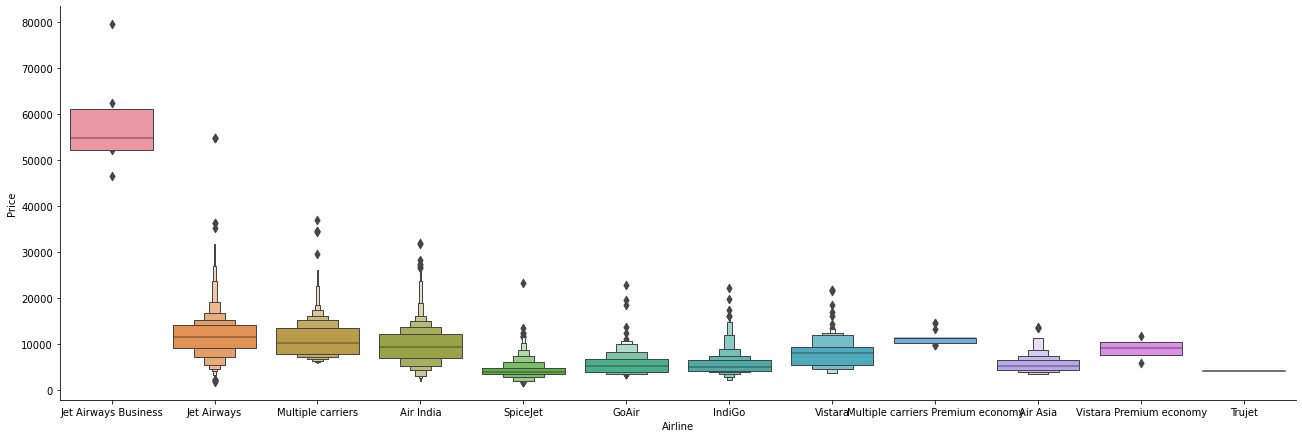

In [26]:
sns.catplot(x='Airline',y = 'Price',data=Fare_Data.sort_values("Price",ascending = False), kind = 'boxen', height = 6, aspect = 3)

### As Airline is a Nominal Data, We will be using OneHotEncoding Classifier

In [27]:
Airline = Fare_Data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
Fare_Data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [29]:
Source = Fare_Data[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


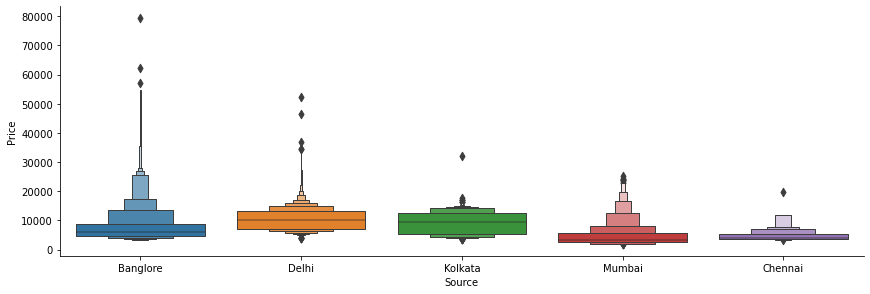

In [30]:
# Plotting a Graph on Source against Price
sns.catplot(x = 'Source', y = "Price", data=Fare_Data.sort_values("Price", ascending=False), kind='boxen', height = 4, aspect = 3)

In [31]:
Fare_Data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [32]:
Destination = Fare_Data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [33]:
Fare_Data["Route"].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → JDH → JAI → DEL → HYD       1
CCU → RPR → HYD → BLR             1
BOM → BLR → CCU → BBI → HYD       1
BLR → HBX → BOM → AMD → DEL       1
CCU → VTZ → BLR                   1
Name: Route, Length: 128, dtype: int64

In [34]:
Fare_Data.drop(['Route','Additional_Info'], axis='columns', inplace = True)

In [35]:
Fare_Data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
Fare_Data.replace({'non-stop' : 0,'1 stop' : 1,'2 stops' : 2,'3 stops' : 3, '4 stops' : 4}, inplace=True)

In [37]:
Fare_Data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes,Arrival Hours,Arrival Mins,Duration Hours,Duration Mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [38]:
Data_Train = pd.concat([Fare_Data, Airline, Destination, Source], axis = 'columns')

In [39]:
Data_Train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes,Arrival Hours,Arrival Mins,Duration Hours,Duration Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [40]:
Data_Train.drop(['Airline','Source','Destination'], axis='columns', inplace=True)

In [41]:
Data_Train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes,Arrival Hours,Arrival Mins,Duration Hours,Duration Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [42]:
Data_Train.shape

(10682, 30)

_________________________________________________________________________________________________

## Test Set

In [66]:
Test_Data = pd.read_excel(r"Test_set.xlsx")

In [67]:
Test_Data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [68]:
print("Test Data Info")
print("-"*75)
print(Test_Data.info())
print()
print()
print("Null Values : ")
print("-"*75)
Test_Data.dropna(inplace = True)
Test_Data.isnull().sum()
Test_Data["Journey_Day"] = pd.to_datetime(Test_Data["Date_of_Journey"], format = "%d/%m/%Y").dt.day
Test_Data["Journey_Month"] = pd.to_datetime(Test_Data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
Test_Data.drop(['Date_of_Journey'], axis = 'columns', inplace = True)
#Duration
Durations = list(Test_Data["Duration"])
for i in range(len(Durations)):
    if len(Durations[i].split()) != 2:
        if "h" in Durations[i]:
            Durations[i] = Durations[i].strip() + " 0m"
        else:
            Durations[i] = "0h " + Durations[i]
            
Durat_Hrs = []
Durat_Mins = []
for i in range(len(Durations)):
    Durat_Hrs.append(int(Durations[i].split(sep = "h")[0])) #Extract Hours from Duration
    Durat_Mins.append(int(Durations[i].split(sep = "m")[0].split()[-1])) #Extracting Minutes
Test_Data["Duration_Hours"] = Durat_Hrs
Test_Data["Duration_Mins"] = Durat_Mins
Test_Data.drop(["Duration"], axis = 'columns', inplace = True)

#Categorical Data
print("Airline")
print("-"*75)
print(Test_Data["Airline"].value_counts())
Airline = pd.get_dummies(Test_Data["Airline"], drop_first = True)

print()

print("Source")
print("-"*75)
print(Test_Data["Source"].value_counts())
Source = pd.get_dummies(Test_Data["Source"], drop_first = True)

print()

print("destination".capitalize())
print("-"*75)
print(Test_Data["Destination"].value_counts())
Destination = pd.get_dummies(Test_Data["Source"], drop_first = True)

#Elimination of 2 Rows with irrelevant info
Test_Data.drop(['Route','Additional_Info'], axis = 'columns', inplace = True)
#Replacing Total Stops
Test_Data.replace({'nonstop' : 0, '1 stop' : 1, '2 stops' : 2, '3 stops' : 3, '4 stops' : 4}, inplace = True)

#concatenate dataframe
data_test = pd.concat([Test_Data, Airline, Source, Destination], axis = 'columns')
print()
print()
print(f"Data Dimensions : {data_test.shape}.")

Test Data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null Values : 
---------------------------------------------------------------------------
Airline
---------------------------------------------------------------------------
Jet Airways                          

In [69]:
data_test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Journey_Day,Journey_Month,Duration_Hours,Duration_Mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Chennai,Delhi,Kolkata,Mumbai
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,1,6,6,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,IndiGo,Kolkata,Banglore,06:20,10:20,1,12,5,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,1,21,5,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,Multiple carriers,Delhi,Cochin,08:00,21:00,1,21,5,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,non-stop,24,6,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
Data_Train.shape

(10682, 30)

In [72]:
Data_Train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hours',
       'Dep_Minutes', 'Arrival Hours', 'Arrival Mins', 'Duration Hours',
       'Duration Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [73]:
X = Data_Train.loc[:,['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hours',
       'Dep_Minutes', 'Arrival Hours', 'Arrival Mins', 'Duration Hours',
       'Duration Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai']]
X.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Minutes,Arrival Hours,Arrival Mins,Duration Hours,Duration Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [74]:
Y = Data_Train.iloc[:,1]
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

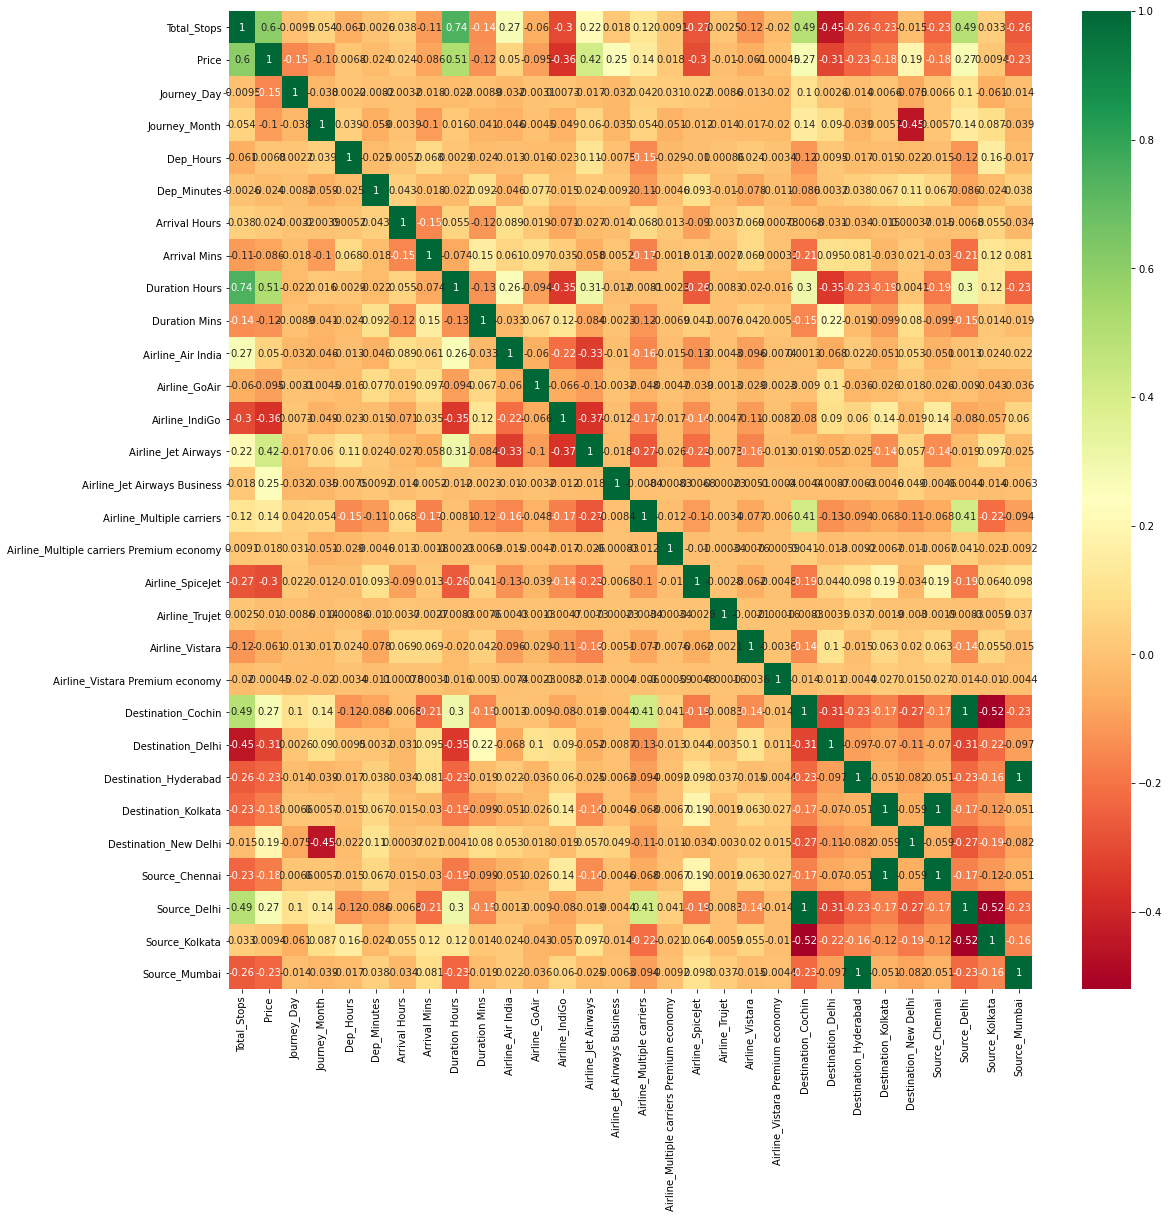

In [78]:
#Finding Correlation between dependent and independent properties
plt.figure(figsize=(18,18))
sns.heatmap(Data_Train.corr(), annot = True, cmap= 'RdYlGn')
plt.show()

In [80]:
# Important Feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
Selection = ExtraTreesRegressor()
Selection.fit(X, Y)

ExtraTreesRegressor()

In [81]:
print(Selection.feature_importances_)

[1.58740477e-01 6.08324131e-01 3.00731060e-03 2.42105633e-03
 2.73617431e-04 1.84053841e-04 3.07818008e-04 1.16586154e-04
 7.16617398e-02 3.23340305e-04 9.84829067e-04 3.95776080e-06
 8.14887121e-03 8.89071346e-02 2.94974833e-02 3.15664807e-03
 1.05318352e-07 2.32996853e-04 1.40164019e-08 2.36413967e-04
 7.00416666e-08 1.96452914e-03 6.00535512e-03 1.44229998e-03
 1.78673702e-05 5.50911808e-03 8.68141369e-06 6.08918652e-03
 4.25324174e-04 2.00898283e-03]


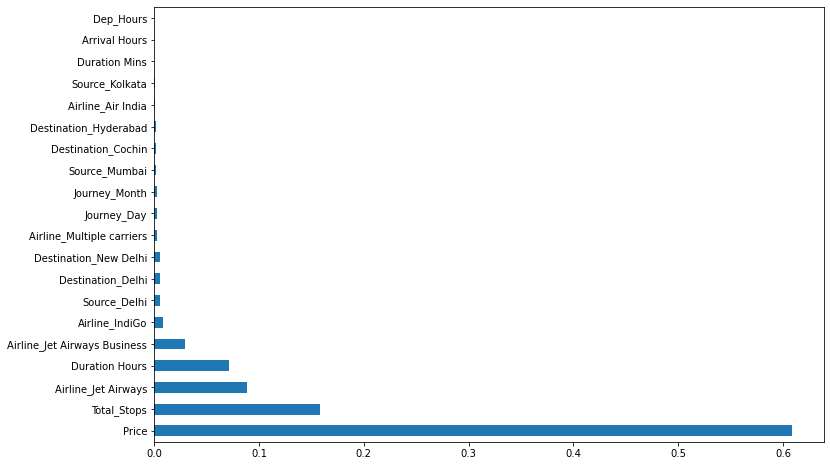

In [82]:
#Plot graphs for Better Visualization
plt.figure(figsize=(12,8))
Feature_Importances = pd.Series(Selection.feature_importances_, index = X.columns)
Feature_Importances.nlargest(20).plot(kind = 'barh')
plt.show()

## Model Fit using Random Forest

### 1. We need to split dataset into train and test set for prediction w.r.t X_Test
### 2. Scaling cannot be done in Random Forest
### 3. Import Model
### 4. Fit the Data
### 5. Predict w.r.t X_Test
### 6. In Regression check RSME Score
### 7. Plot Graph

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
Reg_RF = RandomForestRegressor()
Reg_RF.fit(X_Train, Y_Train)

RandomForestRegressor()

In [84]:
Y_Pred = Reg_RF.predict(X_Test)
Reg_RF.score(X_Train, Y_Train)

0.999541340387756

In [85]:
Reg_RF.score(X_Test, Y_Test)

0.9994357648908437

C:\Users\Shrikant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

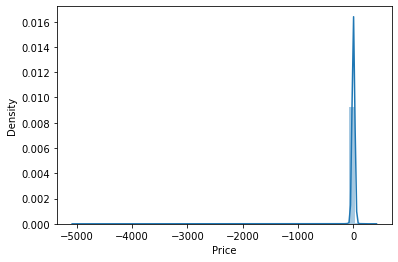

In [86]:
sns.distplot(Y_Test - Y_Pred)
plt.show

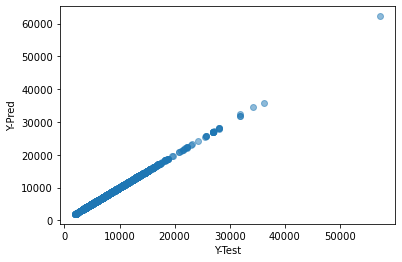

In [91]:
%matplotlib inline
import matplotlib
plt.scatter(Y_Test, Y_Pred, alpha = 0.5)
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.xlabel("Y-Test")
plt.ylabel("Y-Pred")
plt.show()

In [95]:
from sklearn import metrics
print(f"Mean Absolute Error : {metrics.mean_absolute_error(Y_Test, Y_Pred)}.")
print(f"Mean Squared Error : {metrics.mean_squared_error(Y_Test, Y_Pred)}.")
print(f"Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(Y_Test, Y_Pred))}.")

Mean Absolute Error : 4.666359382311643.
Mean Squared Error : 12166.06920369677.
Root Mean Squared Error : 110.2999057284129.


In [97]:
metrics.r2_score(Y_Test, Y_Pred)

0.9994357648908437

## Hyperparameter Tuning

In [98]:
from sklearn.model_selection import RandomizedSearchCV
# No. of trees at Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# No. of Features to be considered at every split
max_features = ['auto', 'sqrt']
#Minimum number of levels in a Tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum no. of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each Leaf Node.
min_samples_leaf = [1, 2, 5, 10]

In [99]:
# Create the Random Grid
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf}

### Random search of Parameters using 5 Fold Cross Validation
### Search across 100 Different Combinations

In [100]:
rf_random = RandomizedSearchCV(estimator=Reg_RF, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)
rf_random.fit(X_Train, Y_Train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  15.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 19.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [101]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

C:\Users\Shrikant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


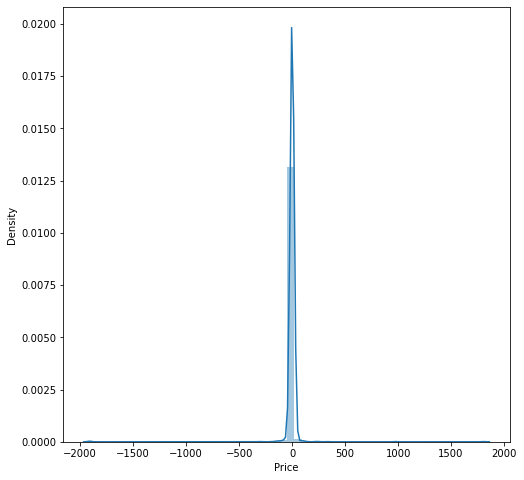

In [102]:
prediction = rf_random.predict(X_Test)
plt.figure(figsize=(8,8))
sns.distplot(Y_Test - prediction)
plt.show()

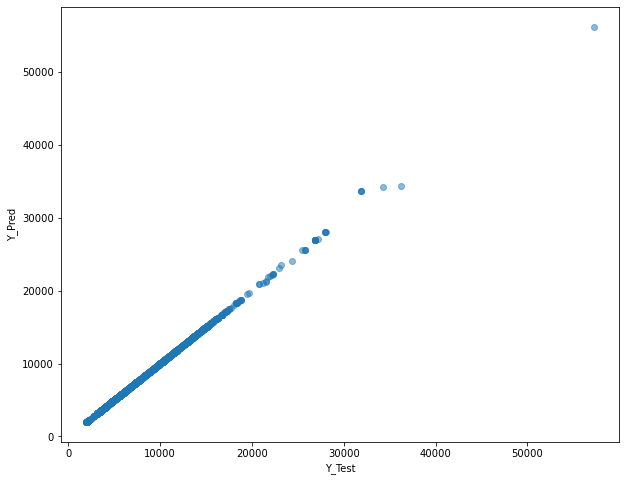

In [104]:
plt.figure(figsize=(10,8))
plt.scatter(Y_Test, prediction, alpha = 0.5)
plt.xlabel("Y_Test")
plt.ylabel("Y_Pred")
plt.show()

In [105]:
from sklearn import metrics
print(f"MAE : {metrics.mean_absolute_error(Y_Test, Y_Pred)}.")
print(f"MSE : {metrics.mean_squared_error(Y_Test, Y_Pred)}.")
print(f"RMSE : {np.sqrt(metrics.mean_squared_error(Y_Test, Y_Pred))}.")

MAE : 4.666359382311643.
MSE : 12166.06920369677.
RMSE : 110.2999057284129.


In [109]:
metrics.r2_score(Y_Test, Y_Pred)

0.9994357648908437

In [112]:
#Testing Code
from random import randint, choice
totalstops = [i for i in range(1,5)]
departuredates = ["01/04/2019","02/04/2017","03/07/2020","18/03/2020","23/08/2019"]
source = Source
if Source == 'Delhi':
    s_Delhi = 1
    s_Kolkata = 0
    s_Mumbai = 0
    s_Chennai = 0
elif Source == 'Kolkata':
    s_Delhi = 0
    s_Kolkata = 1
    s_Mumbai = 0
    s_Chennai = 0
elif Source == 'Mumbai':
    s_Delhi = 0
    s_Kolkata = 0
    s_Mumbai = 1
    s_Chennai = 0
elif Source == 'Chennai':
    s_Delhi = 0
    s_Kolkata = 0
    s_Mumbai = 0
    s_Chennai = 1
else:
    s_Delhi = 0
    s_Kolkata = 0
    s_Mumbai = 0
    s_Chennai = 0

#destination = Destination
if Destination.Delhi == 'Cochin':
    d_Cochin = 1
    d_Delhi = 0
    d_New_Delhi = 0
    d_Hyderabad = 0
    d_Kolkata = 0
elif Destination == 'Delhi':
    d_Cochin = 0
    d_Delhi = 1
    d_New_Delhi = 0
    d_Hyderabad = 0
    d_Kolkata = 0
elif Destination == 'New_Delhi':
    d_Cochin = 0
    d_Delhi = 0
    d_New_Delhi = 1
    d_Hyderabad = 0
    d_Kolkata = 0
elif Destination == 'Hyderabad':
    d_Cochin = 0
    d_Delhi = 0
    d_New_Delhi = 0
    d_Hyderabad = 1
    d_Kolkata = 0
elif Destination == 'Kolkata':
    d_Cochin = 0
    d_Delhi = 0
    d_New_Delhi = 0
    d_Hyderabad = 0
    d_Kolkata = 1
else:
    d_Cochin = 0
    d_Delhi = 0
    d_New_Delhi = 0
    d_Hyderabad = 0
    d_Kolkata = 0

airline = Airline
if airline == 'Jet Airways':
    Jet_Airways = 1
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0
elif airline == 'Indigo':
    Jet_Airways = 0
    IndiGo = 1
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0
elif airline == 'Air India':
    Jet_Airways = 1
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0
elif airline == 'Multiple carriers':
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 1
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0
elif airline == 'SpiceJet':
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 1
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0
elif airline == 'Vistara':
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 1
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0
elif airline == 'GoAir':
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 1
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0
elif airline == 'Multiple carriers Premium economy':
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 1
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0
elif airline == 'Jet Airways Business':
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 1
    Vistara_Premium_economy = 0
    Trujet = 0
elif airline == 'Vistara Premium economy':
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 1
    Trujet = 0
elif airline == 'Trujet':
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 1
else:
    Jet_Airways = 0
    IndiGo = 0
    Air_India = 0
    Multiple_carriers = 0
    SpiceJet = 0
    Vistara = 0
    GoAir = 0
    Multiple_carriers_Premium_economy = 0
    Jet_Airways_Business = 0
    Vistara_Premium_economy = 0
    Trujet = 0
    
date_dep = choice(departuredates)
journey_day = int(pd.to_datetime(date_dep, format = "%Y-%m-%dT%H:%M").day)
journey_month = int(pd.to_datetime(date_dep, format = "%Y-%m-%dT%H:%M").month)
#Departure Hours
dep_hour = int(pd.to_datetime(date_dep, format = "%Y-%m-%dT%H:%M").hour)
dep_min = int(pd.to_datetime(date_dep, format = "%Y-%m-%dT%H:%M").minute)
#Arrival Hours
arr_hour = int(pd.to_datetime(date_dep, format = "%Y-%m-%dT%H:%M").hour)
arr_min = int(pd.to_datetime(date_dep, format = "%Y-%m-%dT%H:%M").minute)
#Duration
dur_hour = abs(arr_hour - dep_hour)
dur_min = abs(arr_min - dep_min)

Predictions = rf_random.predict([[choice(totalstops), journey_day, journey_month,
                                  dep_hour, dep_min, arr_hour, arr_min, dur_hour, dur_min,
                                  Air_India, GoAir, IndiGo, Jet_Airways, Jet_Airways_Business,
                                  Multiple_carriers, Multiple_carriers_Premium_economy, SpiceJet,
                                  Trujet, Vistara, Vistara_Premium_economy, s_Chennai, s_Delhi,
                                  s_Kolkata, s_Mumbai, d_Cochin, d_Delhi, d_New_Delhi, d_Hyderabad, d_Kolkata]])

output = round(Predictions[0], 2)
print(f"Your Flight Rate is Rs {output}.") ## There was a problem with the model, hence there is some minor bug
## The Final Answer will be the Predicted Price in INR.

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().